[Home](../../README.md)

### Model Training - Linear Regression

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. We will now Train a Linear regression algorithm on the features you have engineered to see how closely we can predict the bike count outcomes in Seoul.


#### Step 1

Load the required dependencies:

In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

#### Step 2

Store the data columns for Linear Regression.

In [12]:
# Create a data frame from the csv file
training_data = pd.read_csv('2.3.2.training_data.csv')

x_name = 'Temp'
y_name = 'Count'
x = np.array(training_data[x_name]).reshape(-1, 1)
y = np.array(training_data[y_name])

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

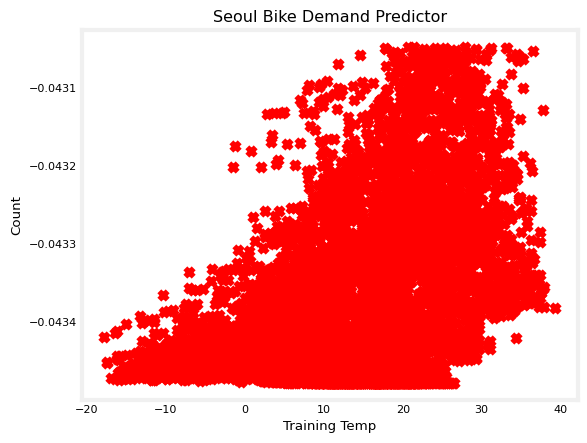

In [13]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Seoul Bike Demand Predictor")
# Set the y-axis label
plt.ylabel(f'{training_data[y_name].name}')
# Set the x-axis label
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

#### Step 4

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [4]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 5

Plot the features, targets and model (linear regression).

* I will add `y_pred = np.maximum(0, y_pred)` to clip negative values to zero. However, this may represent innacurate graphs

    * Some predictions are negative. This is due to the Count column having many zeros, with linear regression ignoring the boundaries.

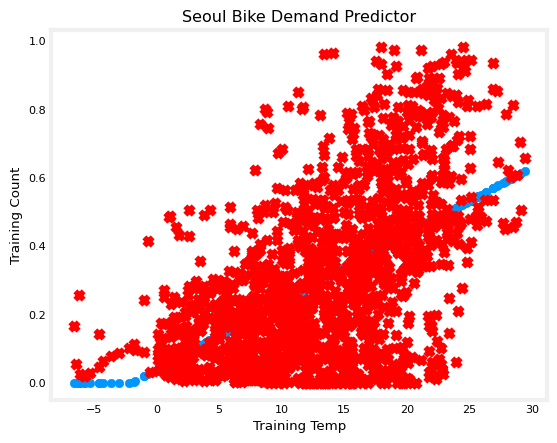

In [5]:
y_pred = my_model.predict(x)

# Clip negative values to zero
y_pred = np.maximum(0, y_pred)

plt.scatter(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("Seoul Bike Demand Predictor")
plt.ylabel(f'Training {training_data[y_name].name}')
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

* The model works moderately with poor intuition

    * Features like temperature, humidity and visibility also have vastly different scale

    * Prediction is too low (maximum 0.6)

    * Features towards higher end due to it being summer

In [6]:
# save the model to disk
filename = 'my_saved_model_v1.sav'
pickle.dump(my_model, open('../2.4.model_testing_and_validation/' + filename, 'wb'))

#### Step 6. Multiple Variable Linear Regression

In [3]:
# Create a data frame from the csv file
training_data = pd.read_csv('2.3.2.training_data.csv')

x_name = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']
y_name = 'Count'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

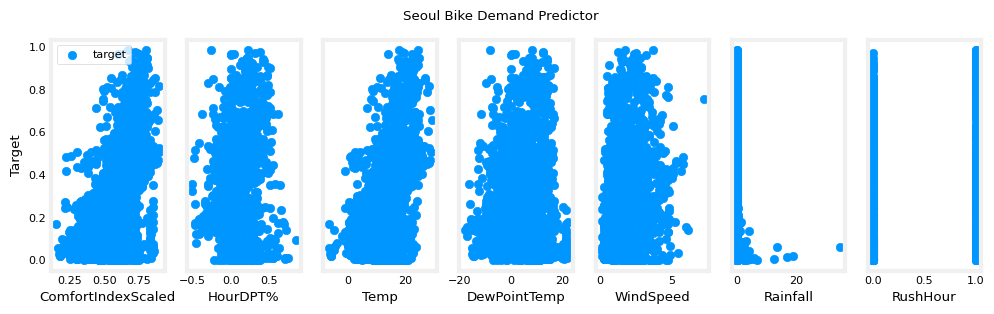

In [4]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

* I experimented with `ComfortAdd` beforehand, however this performed poorly due to noise or inconsistencies in the data, which reduced its reliability as a feature

* Many combined features I used were reused as well, due to high effectiveness and lack of other features. I made sure not to introduct noise

In [5]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

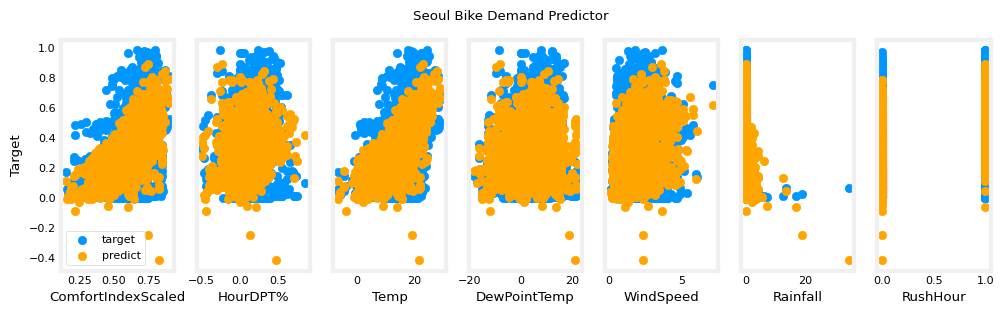

In [6]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)

fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

* The graph shows clear outliers which are negative

    * This could be because of poor feature scaling, however this issue is later solved with **polynominal regression**

In [7]:
# save the model to disk
filename = 'my_saved_model_v2.sav'
pickle.dump(my_model, open('../2.4.model_testing_and_validation/' + filename, 'wb'))